# 微分方程式モデル

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.integrate import odeint, solve_ivp

# 日本語フォントの設定（Mac:'Hiragino Sans', Windows:'MS Gothic'）
plt.rcParams['font.family'] = 'Hiragino Sans'

本章の内容は，文献{cite}`Kawamura2021,Endo2017,Odaka2018,Hashimoto2021` を主に参考にしている．

## 微分方程式とは？

### 微分方程式の定義

独立変数を $ t $，$ t $に伴って決まる従属変数を $ x(t) $ とする．
このとき，$ x $ の $ t $ による微分を含む方程式を**微分方程式**と呼ぶ．
例えば，以下は微分方程式の例である：

\begin{align*}
    \frac{dx}{dt} &= 2t \\[10pt]
    m\frac{d^2x}{dt^2} &= -mg-k\left(\frac{dx}{dt}\right)^2 \\
\end{align*}

微分方程式は高階の微分を含んでもよく，最も高次の微分の次数は**微分方程式の階数**と呼ばれる．
また，$ x $ と $ x $ の微分が全て1次式である場合を**線形微分方程式**，それ以外を**非線形微分方程式**と呼ぶ．
例えば，上の式は，線形の1階微分方程式と非線形の2階微分方程式である．
なお，微分方程式には，独立変数が1つである**常微分方程式**と独立変数が複数ある**偏微分方程式**があるが，本章では常微分方程式のみを扱う．

微分方程式は2次方程式や連立方程式のように解を求めることができる．
微分方程式において解を求めるとは，与えられた微分方程式を満たすような関数 $ x(t) $ を求めることを指し，これを**微分方程式を解く**という．

微分方程式が与えられたときにその解を求める方法は主に２種類存在する．
１つ目は式変形を行って解く方法で，これを**解析的に解く**という．
一般に，微分方程式が与えられたときにそれを解析的に解くのは困難であることが多く，非線形の微分方程式や偏微分方程式の場合は特に難しい．
そこで，このような場合には２つ目の方法として，数値計算によって解を求める方法がある．
これを**数値的に解く**という．

以下では解析的に解ける微分方程式の例をいくつか紹介する．
また，Pythonを使って微分方程式を数値的に解く方法についても紹介する．

### 簡単な微分方程式

$ t $ が時刻，$ x $ が物体の位置を表すとすると，物体の速度 $ v $ は $ v = \frac{dx}{dt} $ で与えられる．
いま，速度が一定値 $ v_{0} $ であると仮定すると，

$$
    \frac{dx}{dt} = v_{0} 
$$

が成り立つ．
これは，物体の運動を表す最も簡単な微分方程式である．
この微分方程式の解を求めるには，両辺を $ t $ で積分すれば良い：

$$
    \int \frac{dx}{dt} dt = \int v_{0} dt \\[10pt]
    x(t) = v_{0} t + C
$$

ここで，$ C $ は積分定数であるが，$ t=0 $ の位置を $ x(0)=x_{0} $ とすると，$ C=x_{0} $ となる．
よって，微分方程式の解は，

$$
    x(t) = v_{0} t + x_{0}
$$

と表され，物体は等速直線運動することが分かる．
以上のように，時間 $ t $ を独立変数とする微分方程式に対し，$ t=0 $ のときの条件（**初期条件**）を用いて解を求めることを**初期値問題**と呼ぶ．

## 人口の増加

個体数の増減という問題は，実社会から自然界まで幅広く存在する．
例えば，実社会において，今後数十年で人口がどのように増減するかを予測することは，国家レベルで議論するべき大問題である．
また，自然界においても，様々な生物種の個体数がどのように増減するか分かれば，食物連鎖のダイナミクスを理解したり，獣害に関する対策を立てたりするのに役立つ．
個体数の増減は，微分方程式で記述される現象の典型例であり，微分方程式の基礎を理解するのにも適した問題である．
以下では，個体数の増減に関する微分方程式のうち，いくつかの基本的な例を紹介する．

### マルサスモデル

時刻 $ t $ におけるある国の総人口を $ N(t) $ とすると，人口の増加率は $ dN(t)/dt $ と表される．
経済学者のマルサス（Thomas Robert Malthus）は，人口の増加率がそのときの人口に比例すると考え，以下のようなモデルを提案した：

$$
	\frac{dN}{dt} = aN(t)
$$

この式は1階微分方程式であり，**マルサスモデル**と呼ばれる．

マルサスモデルは，以下のように独立変数 $ t $ と従属変数 $ N(t) $ を左辺と右辺に分離することができる：

$$
	\frac{1}{N} dN = \alpha dt
$$

このような変数の分離が可能な微分方程式は，**変数分離形**と呼ばれ，変数分離することで積分が可能となる．
実際に両辺を不定積分すると，

$$
	\ln N = \alpha t + C
$$

より

$$
	N(t) = \mathrm{e}^{\alpha t + C}
$$

となる．
また，$ N(t) $ の初期条件を $ t=0 $ で $ N(0)=N_{0} $ とすると

$$
	N(0) = \mathrm{e}^{C} = N_{0}
$$

となるので，一般解は

$$
	N(t) = N_{0} \mathrm{e}^{\alpha t}
$$

となる．

マルサスモデルの解は $ N(t) $ が $ t $ の関数として表されているので，初期時刻での人口 $ N_{0} $ を与えれば，その後の任意の時刻において人口を予測できる．
特に，人口が指数関数的に際限なく増加するというのがマルサスモデルの特徴である．

### ロジスティックモデル

マルサスモデルでは，指数関数的な増加がいつまでも続くが，人口が増えすぎると食料資源の不足や環境的要因などによって人口の増加を抑制する効果がはたらくのが自然である．
このような考察から，より現実に即したモデルとしてVerhulstによって導入されたのが以下の微分方程式である：

$$
	\frac{dN}{dt} = \gamma \left(1 - \frac{N}{N_{\infty}}\right)N
$$

これは**ロジスティックモデル**と呼ばれる．

ロジスティックモデルは右辺が非線形な関数となっているが，これも変数分離形なのでマルサスモデルと同じように解くことができる．
まず，式を以下のように変形する：

$$
	\int \frac{dN}{N(1 - N/N_{\infty})} = \int \gamma dt
$$

ここで，左辺の被積分変数を部分分数分解すると，

$$
	\int \left[\frac{1}{N} - \frac{1/N_{\infty}}{(1-N/N_{\infty})}\right]dN = \int \gamma dt
$$

となる．
これより，両辺を不定積分することができて，

\begin{align*}
	\ln \left(\frac{N}{1-N/N_{\infty}}\right) &= \gamma t + C
\end{align*}

となる．
さらに，初期条件として　$ t=0 $　で　$ N(0)=N_{0} $　とすれば，最終的に

$$
	N(t) = \frac{N_{\infty}}{1+[(N_{\infty}/N_{0})-1]\mathrm{e}^{-\gamma t}}
$$

という一般解を得る．

得られた一般解は**シグモイド関数**と呼ばれ，下図のような時間変化となる．
初期の個体数が $ N_{0} < N_{\infty} $ を満たす場合には，最初は指数関数的な増加を示すが，次第に増加率が小さくなっていき，最終的には $ N_{\infty} $ に収束する．
この意味で，$ N_{\infty} $ は人口の上限を表す定数であることが分かる．
<!-- 一方，$ N_{0} > N_{\infty} $ の場合には指数関数的な減少を示すが，この場合にも最終的には $ N_{\infty} $ へと収束する． -->

なお，実社会における人口の増加はマルサスモデルよりもロジスティックモデルに近いふるまいをするが，それでも完璧に記述できるわけではない．
生物集団の中でも微生物などの場合には，環境をコントロールした実験によって，その増殖の仕方がロジスティックモデルによく従うことが分かっている．
生物集団の個体数のモデルをより現実に近づけるためには，多数の生物種の間の捕食・被食関係を考慮する方法が考えられる．
このようなモデルの中で単純なものとして，2種の生物間の相互作用を考慮した**ロトカ・ヴォルテラモデル**が知られている．

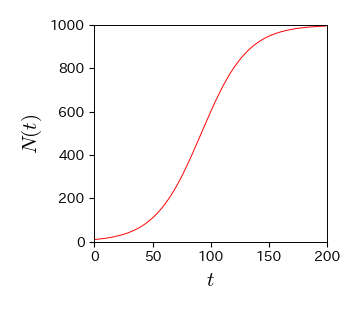

In [24]:
def f_logistic(t, N0, N_max, gamma):
    return N_max*(1+(N_max/N0 - 1)*np.exp(-np.clip(gamma*t, -709, 100000)))**(-1)

fig, ax = plt.subplots()
t = np.arange(200)
ax.plot(t, f_logistic(t, 10, 1000, 0.05), 'r-')

ax.set_xlim(0, 200), ax.set_ylim(0, 1000); 
ax.set_xlabel('$t$', fontsize=15)
ax.set_ylabel('$N(t)$', fontsize=15);

### オイラー法による数値解法

## 感染症の流行

### 感染症のモデル化

これまでの歴史において，人類は天然痘，ペスト，結核，コレラ，エイズ，エボラ出血熱，といった様々な感染症の流行を経験し，現在もなお新型コロナウイルスとの闘いが続いている．
感染症の流行は複雑な現象であるが，そのエッセンスは細菌やウイルスが人から人へ伝播するということである．
そこで，感染症を伝播現象と捉えてそのプロセスを単純化すれば，感染者数の大まかな増減を比較的単純な微分方程式で記述することができる．

通常，感染症の数理モデルでは，以下のように複数の状態を考える（これらの他にも，自身が感染しているが他者に移す可能性がない潜伏期の状態（状態 $ E $ ）など，様々な状態を考えることができる．）：

- 状態$ S $：自身が感染する可能性のある状態（Susceptible or Suspicious）
<!-- - 状態$ E $：自身が感染しているが，他者に移す可能性がない状態（Exposed） -->
- 状態$ I $：自身が感染していて，他者に移す可能性がある状態（Infected）
- 状態$ R $：感染から回復し，他者に移す可能性がない状態（Recovered）
  
その上で，時刻 $ t $ においてそれぞれの状態にいる人口の割合を $ S(t),\ I(t),\ R(t) $ とし，これらの変数が従う微分方程式を定める．
ただし，常にこれら全ての状態を考慮するわけではなく，例えば最も簡単なモデルでは状態 $ S $ と状態 $ I $ だけを取り入れる．
以上により，微分方程式を解けば，それぞれの状態にいる人口がどのように時間変化するかが分かるので，感染症の流行を記述することができる．

なお，通常は微分方程式に加え，全ての変数の和が1（例えば，$ S(t)+I(t)+R(t)=1 $）という関係が成り立つと仮定する．
この関係式は，総人口を $ M $ としたときに $ MS(t)+MI(t)+MR(t)=M $ と書けるので，人口が常に一定であるという条件を表す．
これは，考えるシステムにおいて，感染症以外の理由による人口変動が無視できることを案に仮定している．

以下では，感染症の数理モデルの中でも単純でよく知られた３つのモデルを紹介する．

### SIモデル

まず，未感染者（状態 $ S $）が感染者（状態 $ I $）と接触すると，一定の確率で感染者（状態 $ I $）に変わるというモデルを考える．
ただし，一度感染した者はずっと感染したままとする（つまり，最終的に全員が状態 $ I $ になる）．
このようなモデルは感染症モデルの中で最も単純なモデルであり，**SIモデル**と呼ばれる．

SIモデルのダイナミクスは，$ S(t) $ が一定確率で $ I(t) $ に変わるというものであり，短い時間間隔 $ \Delta t $ における $ S(t) $ の変化は以下の式で与えられる：

$$
	S(t+\Delta t) = S(t) - \gamma S(t)I(t)\Delta t
$$

ここで，右辺第２項は $ S(t) $ の減少分であり，$ S(t)I(t) $ は未感染者と感染者の接触率，$ \gamma $ は感染確率を表す．
すなわち，未感染者（状態 $ S $）と感染者（状態 $ I $）が接触すると確率 $ \gamma $ で未感染者の割合が減ることを意味する．
この式の両辺を $ \Delta t $ で割って $ \Delta t\to 0 $ の極限を取ると，

$$
	\frac{dS}{dt} = -\gamma S(t)I(t)
$$

が得られる．
これが未感染者の割合 $ S(t) $ の変化を記述する微分方程式である．

一方，感染者の割合 $ I(t) $ については，$ S(t) $ の減少分がそのまま増えるので，

$$
	\frac{dI}{dt} = \gamma S(t)I(t)
$$

が成り立つ．

以上をまとめると，SIモデルは次のような連立微分方程式として記述される：

\begin{align}
	\left \{
	\begin{aligned}
		\frac{dS}{dt} &= -\gamma S(t)I(t) \\[10pt]
		\frac{dI}{dt} &= \gamma S(t)I(t)
	\end{aligned}
	\right.
\end{align}

ただし，$ S(t)+I(t)=1 $　という関係式が成り立っていることを考慮すると，２つの微分方程式から　$ S(t) $　を消去することができ，$ I(t) $　だけから成る以下の微分方程式に変形できる：

$$
	\frac{dI(t)}{dt} = \gamma (1-I(t))I(t)
$$

さらに，この式の両辺に総人口 $ M $ を掛けると

$$
	\frac{dMI(t)}{dt} = \gamma \left(1-\frac{MI(t)}{M}\right)MI(t)
$$

となる．
これは，感染者数 $ MI(t) $ に対する微分方程式であるが，ロジスティックモデルと全く同じ形をしている．
よって，感染者数は最終的に総人口 $ M $ に収束するが，その増え方は指数関数的な急増から徐々に緩やかなる．


### SIRモデル

SIモデルは一度感染したらずっと感染したままという非現実的なモデルであった．
しかし，多くの感染症では感染状態（$ I $）になってから時間が経つと，免疫を獲得してそれ以上感染せず，かつ他者に移す可能性もない状態（$ R $）になることが多い．
そこで，$ S(t),\ I(t) $ に加えて新たな変数 $ R(t) $ も加えた以下のモデルを考える：

\begin{align}
	\left\{
	\begin{aligned}
		\frac{dS}{dt} &= - \gamma S(t)I(t) \\[10pt]
		\frac{dI}{dt} &= \gamma S(t)I(t) - \lambda I(t) \\[10pt]
		\frac{dR}{dt} &= \lambda I(t)
	\end{aligned}
	\right .
\end{align}

このモデルは**SIRモデル**と呼ばれ，KermackとMcKendrickによって1927年に提案された．
SIRモデルは感染症の標準的な数理モデルとしてよく用いられている．

SIRモデルにおいて，第１式はSIモデルと全く同じである．
一方，感染者の割合 $ I(t) $ に対する式（第２式）には新たに第２項 $ -\lambda I(t) $ が加わっている．
これは，感染者（状態$ I $）が一定の確率 $ \lambda $ で免疫獲得者（状態$ R $）に変化して $ I(t) $ が減少することを表している．
また，免疫獲得者の割合 $ R(t) $ は $ I(t) $ の減少分だけ増えるので，これを表したのが第３式である．
なお，これまでと同様に $ S(t)+I(t)+R(t)=1 $ も成り立っている．

SIRモデルは3変数の連立微分方程式であり，これを一般的に解くのは難しいので通常はコンピュータによる数値計算を行う．
一方，感染症が拡大するかどうか（つまり $ I(t) $ が増えるかどうか）は微分方程式を解かずに評価することができる．
まず，感染者の割合 $ I(t) $ の時間変化を記述する第２式だけを取り出す：

$$
	\frac{dI}{dt} = \gamma S(t)I(t) - \lambda I(t)
$$

この式は $ I(t) $ の増加速度 $ dI(t)/dt $ を表す式なので，右辺が正であれば $ I(t) $ は増加，負であれば減少する．
これは，$ S(t)\gamma /\lambda $ が1より大きければ増加，小さければ減少と言い換えることもでき，このときに現れる量

$$
	R_{t} = S(t)\frac{\gamma}{\lambda}
$$

は**実効再生産数**と呼ばれている．
実効再生産数 $ R_{t} $ は「感染者（$ I $状態）が回復するまで（$ R $状態になるまで）に平均的に感染させる数」という意味を持つことが示されている．

$ R_{t} $ を実際の感染者数のデータから見積もる方法はいくつか提案されており，実際の感染症対策の現場でも，$ R_{t} $ の値が感染症の流行の評価指標となっている．

なお，感染初期にはほぼ全員が非感染者（状態$ S $）なので，$ S(t)\approx 1 $ と近似できる．
この場合に得られる $ R_{0}=\gamma/\lambda $ は**基本再生産数**と呼ばれ，病原菌あるいはウイルスそのものの感染力の強さを意味する．

### Pythonによるシミュレーション